<a href="https://colab.research.google.com/github/DiNOV-Tokyo/yolov5/blob/main/DL_torchvision_ResNet101_TransferLearning_Inagi_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.ResNet101で転移学習・推論

参考にしたサイト# https://tetsumag.com/2021/01/11/ml7/



## 1.1 Google Drive をマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My\ Drive/Colab\ Notebooks
#%mkdir yolo_train
%cd yolo_train

/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Colab Notebooks/yolo_train


## 1.2 モジュール読み込み

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms

import numpy as np
from tqdm import tqdm
from PIL import Image

print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.9.0+cu102 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


## 1.3 各種準備

In [ ]:
# transformsを定義
size = (224, 224)
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


In [ ]:
# datasetsを定義
train_data_dir = 'dataset/train'
val_data_dir = 'dataset/val'

image_datasets = {
    'train': torchvision.datasets.ImageFolder(train_data_dir, transform=data_transforms['train']),
    'val': torchvision.datasets.ImageFolder(val_data_dir, transform=data_transforms['val'])
}

dataloaders = {
    'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=10, shuffle=True),
    'val': torch.utils.data.DataLoader(image_datasets['val'], batch_size=5)
}

dataset_sizes = {
    'train': len(image_datasets['train']),
    'val': len(image_datasets['val'])
}

#class_names = image_datasets['train'].classes
class_namse = ['Cheetah', 'Jaguar', 'Leopard', 'Lion', 'Tiger', 'aoi-shrine', 'gym', 'monument', 'pump', 'shrine', 'stone', 'temple']
print('分類種類:', class_names)


分類種類: ['Cheetah', 'Jaguar', 'Leopard', 'Lion', 'Tiger', 'aoi-shrine', 'gym', 'monument', 'pump', 'shrine', 'stone', 'temple']


In [5]:
class_names = ['Cheetah', 'Jaguar', 'Leopard', 'Lion', 'Tiger', 'aoi-shrine', 'gym', 'monument', 'pump', 'shrine', 'stone', 'temple']
print('分類種類:', class_names)

分類種類: ['Cheetah', 'Jaguar', 'Leopard', 'Lion', 'Tiger', 'aoi-shrine', 'gym', 'monument', 'pump', 'shrine', 'stone', 'temple']


## 1.7 推論

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms

import numpy as np
from tqdm import tqdm
from PIL import Image

print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.9.0+cu102 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


torch.Size([12])
[0.09237074 0.02348718 0.02246262 0.6264006  0.16036464 0.00193092
 0.03728736 0.0039059  0.01351837 0.00344862 0.01079527 0.0040279 ]
Lion


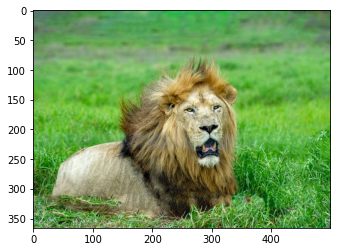

In [6]:
# テストデータで確認
# 今回学習したモデルでテスト
# モデルはGPUで学習。GPUを使って推論するときはこれでOK
#best_model = torch.load('best_model_resnet101_tl20210906.pth')
# CPUで推論するときはmap_location="CPU"を指定
best_model = torch.load('best_model_resnet101_tl20210906.pth', map_location="cpu")


# 対象画像
filename = 'dataset/test.jpg'
#filename = 'dataset/monument.JPG'
#filename = 'dataset/pump.JPG'
filename = 'dataset/stone.JPG'
#filename = 'dataset/aoi-shrine.JPG'
filename = 'dataset/Lion.jpeg'


# 読み込み画像をリサイズやtensorなどの方に変換
input_image = Image.open(filename)

preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

# GPU使える場合はGPUを使う
# CPUを使うときは、コメントアウト
#if torch.cuda.is_available():
    #input_batch = input_batch.to('cuda')
    #best_model.to('cuda')

# AIの判定
with torch.no_grad():
    output = best_model(input_batch)
output = torch.nn.functional.softmax(output[0], dim=0)
print(output.shape)

# 出力結果から2種類のうちどれかを数値で取得
output = output.to('cpu').detach().numpy().copy()
ind = np.argmax(output)
print(output)
print(class_names[ind])

%matplotlib inline
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread(filename),cmap="gray")